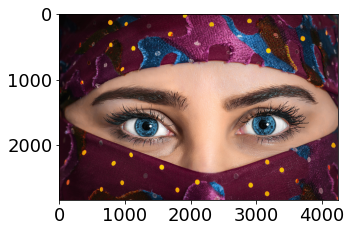

In [9]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt


plt.rcParams['figure.figsize']=[5,5]
plt.rcParams.update({'font.size':18})
path=r'image_load.jpg'
A = plt.imread(path)
B = np.mean(A, -1); #convert RGB to grayscale
plt.figure()
plt.imshow(A)

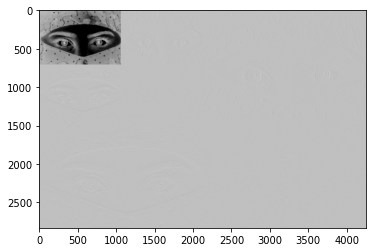

<Figure size 1296x1152 with 0 Axes>

In [4]:
n= 2
w= 'db1'
coeffs= pywt.wavedec2(B,wavelet=w,level=n)
#print(np.abs(coeffs[0]).max())

#normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level+1]= [d/np.abs(d).max() for d in coeffs[detail_level+1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)
plt.imshow(arr,cmap='gray_r', vmin=-0.25, vmax = 0.75)
plt.rcParams['figure.figsize'] = [16,16]
fig = plt.figure(figsize= (18,16))
plt.show()


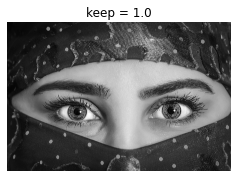

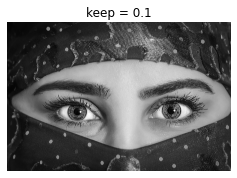

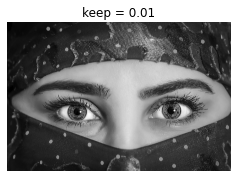

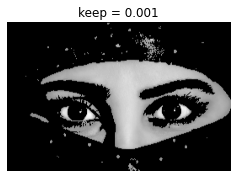

In [8]:
n= 4
w='db1'
coeffs= pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices= pywt.coeffs_to_array(coeffs)

Csort= np.sort(np.abs(coeff_arr.reshape(-1)))
arr = (1.0, 0.1, 0.01, 0.001)
for i, keep in enumerate(arr):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind= np.abs(coeff_arr)>thresh
    cfilt = coeff_arr * ind 
    coeffs_filt = pywt.array_to_coeffs(cfilt,coeff_slices,output_format='wavedec2')
    
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.imsave(f'./image{i}.jpg', Arecon)
    plt.axis('off')
    plt.rcParams['figure.figsize']=[4,4]
    plt.title('keep = '+ str(keep))
   